In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/student_data_uncleaned.csv'  )

In [ ]:
data.head()

,student_id,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade
0,1,14,male,public,post graduate,3.1,84.3,yes,<15 min,NaN,notes,42.7,55.4,57.0,53.1,e
1,2,18,female,public,graduate,3.7,87.8,yes,>60 min,NaN,Notesss,57.6,68.8,64.8,61.3,d
2,3,17,female,private,post graduate,7.9,65.5,no,<15 min,no,notes,84.8,95.0,79.2,89.6,b
3,4,16,other,public,Postgraduate,1.1,58.1,no,15-30 min,NaN,notes,44.4,27.5,54.7,41.6,e
4,5,16,female,public,high school,1.3,61.0,yes,30-60 min,NaN,group study,8.9,32.7,30.0,25.4,f


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26250 entries, 0 to 26249
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             26250 non-null  int64  
 1   age                    26250 non-null  int64  
 2   gender                 26250 non-null  object 
 3   school_type            26250 non-null  object 
 4   parent_education       26250 non-null  object 
 5   study_hours            25472 non-null  float64
 6   attendance_percentage  26250 non-null  float64
 7   internet_access        26250 non-null  object 
 8   travel_time            26250 non-null  object 
 9   extra_activities       7875 non-null   object 
 10  study_method           26250 non-null  object 
 11  math_score             26250 non-null  float64
 12  science_score          25470 non-null  float64
 13  english_score          26250 non-null  float64
 14  overall_score          26250 non-null  float64
 15  fi

## Insights on the Dataset

### 1️⃣ Dataset Overview
- Total entries: 26,250  
- Total columns: 16  
- Column types: 6 numerical, 2 integer, 8 object  

### 2️⃣ Missing Values
- `study_hours` has 778 missing values (~3%) → has missing values.  
- `science_score` has 780 missing values (~3%) → has missing values.  
- `extra_activities` has 18,375 missing values (~70%) → likely candidate for deletion.  
- All other columns are complete.

### 3️⃣ Notes
`study_hours` and `science_score` → fillna

`extra_activities` has a very high missing rate → drop coloumn


In [ ]:
data.shape

(26250, 16)

In [ ]:
data.describe()

,student_id,age,study_hours,attendance_percentage,math_score,science_score,english_score,overall_score
count,26250.000000,26250.000000,25472.000000,26250.000000,26250.000000,25470.000000,26250.000000,26250.000000
mean,7494.947086,16.481676,4.307025,75.080712,63.782766,63.689439,64.119371,64.304089
std,4324.587748,1.704656,2.412991,14.360575,20.876598,20.930373,24.246683,23.346480
min,1.000000,14.000000,-0.996711,50.000000,0.000000,0.000000,0.000000,-28.951834
25%,3744.250000,15.000000,2.300000,62.800000,48.300000,48.200000,47.900000,48.700000
50%,7467.500000,16.000000,4.300000,75.000000,64.100000,64.000000,64.200000,64.300000
75%,11248.750000,18.000000,6.100000,87.400000,80.000000,79.900000,80.300000,79.400000
max,15000.000000,19.000000,15.995202,100.000000,100.000000,100.000000,199.184138,199.998619


### Observations on Scores and Study Habits
- `study_hours` ranges from -0.99 to 15.99 hours/day → unrealistic low/high values indicate injected outliers.  
- `attendance_percentage` mostly high (50–100%) → students generally attend classes regularly.  
- `math_score` and `science_score` show some failing students (0 scores).  
- `english_score` and `overall_score` contain extreme values, some >100 or negative → need outlier handling.


In [ ]:
data.describe(include="O")

,gender,school_type,parent_education,internet_access,travel_time,extra_activities,study_method,final_grade
count,26250,26250,26250,26250,26250,7875,26250,26250
unique,3,2,7,3,4,2,7,6
top,other,private,diploma,yes,15-30 min,yes,mixed,d
freq,8875,13384,4549,22285,6695,3993,4565,6609


In [ ]:
cat_data = data.select_dtypes(include="object")
for col in cat_data:
    print("col_name:", col)
    print("Number of unique values:", data[col].nunique())
    print("Unique values:", data[col].unique())
    print("-"*40)

col_name: gender
Number of unique values: 3
Unique values: ['male' 'female' 'other']
----------------------------------------
col_name: school_type
Number of unique values: 2
Unique values: ['public' 'private']
----------------------------------------
col_name: parent_education
Number of unique values: 7
Unique values: ['post graduate' 'graduate' 'Postgraduate' 'high school' 'no formal'
 'diploma' 'phd']
----------------------------------------
col_name: internet_access
Number of unique values: 3
Unique values: ['yes' 'no' 'Yes   ']
----------------------------------------
col_name: travel_time
Number of unique values: 4
Unique values: ['<15 min' '>60 min' '15-30 min' '30-60 min']
----------------------------------------
col_name: extra_activities
Number of unique values: 2
Unique values: [nan 'no' 'yes']
----------------------------------------
col_name: study_method
Number of unique values: 7
Unique values: ['notes' ' Notesss ' 'group study' 'coaching' 'textbook' 'mixed'
 'online vid

**Insight:**  
- `parent_education` has inconsistent values: 'post graduate', 'Post Graduate', 'PostGraduate'.  
- `internet_access` values inconsistent: 'yes','Yes   ','no'.  
- `study_method`: contains 'notes' and ' Notesss ' → requires cleaning.

In [ ]:
data.dtypes

,0
student_id,int64
age,int64
gender,object
school_type,object
parent_education,object
study_hours,float64
attendance_percentage,float64
internet_access,object
travel_time,object
extra_activities,object


In [ ]:
for col in cat_data:
    print(f"Value counts for column: {col}")
    print(data[col].value_counts(dropna=False))
    print("-"*40)


Value counts for column: gender
gender
other     8875
female    8704
male      8671
Name: count, dtype: int64
----------------------------------------
Value counts for column: school_type
school_type
private    13384
public     12866
Name: count, dtype: int64
----------------------------------------
Value counts for column: parent_education
parent_education
diploma          4549
post graduate    4405
high school      4390
graduate         4324
phd              4298
no formal        4283
Postgraduate        1
Name: count, dtype: int64
----------------------------------------
Value counts for column: internet_access
internet_access
yes       22285
no         3964
Yes           1
Name: count, dtype: int64
----------------------------------------
Value counts for column: travel_time
travel_time
15-30 min    6695
30-60 min    6657
>60 min      6484
<15 min      6414
Name: count, dtype: int64
----------------------------------------
Value counts for column: extra_activities
extra_activities


In [ ]:
data.isnull().sum()

,0
student_id,0
age,0
gender,0
school_type,0
parent_education,0
study_hours,778
attendance_percentage,0
internet_access,0
travel_time,0
extra_activities,18375


In [ ]:
data.isnull().mean() * 100

,0
student_id,0.000000
age,0.000000
gender,0.000000
school_type,0.000000
parent_education,0.000000
study_hours,2.963810
attendance_percentage,0.000000
internet_access,0.000000
travel_time,0.000000
extra_activities,70.000000


## Missing Values Analysis

- `study_hours`  `science_score` has **~2.96% missing values**, which is relatively small and can be handled using imputation.

- `extra_activities` has **70% missing values**, which is extremely high and makes this feature unreliable.


In [ ]:
data.duplicated().sum()

np.int64(6062)

# **wrangling**
1. **Clean categorical inconsistencies** (strip spaces, lowercase).  
2. **Handle missing values:**  
   - Impute `study_hours`  `science_score`
   - Drop `extra_activities`  
3. **Remove outliers:**
4. **Remove duplicates**


In [ ]:
data["study_hours"]=data["study_hours"].fillna(data["study_hours"].median())
data["science_score"]=data["science_score"].fillna(data["science_score"].median())

  
Filled missing  with the **`median`** because the column has outliers, and the mean is senestive to outliers.

In [ ]:
data.drop("extra_activities",axis=1, inplace=True)

In [ ]:
data.drop("student_id",axis=1, inplace=True)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.isnull().sum()

,0
age,0
gender,0
school_type,0
parent_education,0
study_hours,0
attendance_percentage,0
internet_access,0
travel_time,0
study_method,0
math_score,0


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
cat_data2 = data.select_dtypes(include='object').columns

for col in cat_data2:
    data[col] = data[col].str.strip().str.title()

In [ ]:
for col in cat_data2:
    print("col_name:", col)
    print("Unique values:", data[col].unique())
    print("-"*40)

col_name: gender
Unique values: ['Male' 'Female' 'Other']
----------------------------------------
col_name: school_type
Unique values: ['Public' 'Private']
----------------------------------------
col_name: parent_education
Unique values: ['Post Graduate' 'Graduate' 'Postgraduate' 'High School' 'No Formal'
 'Diploma' 'Phd']
----------------------------------------
col_name: internet_access
Unique values: ['Yes' 'No']
----------------------------------------
col_name: travel_time
Unique values: ['<15 Min' '>60 Min' '15-30 Min' '30-60 Min']
----------------------------------------
col_name: study_method
Unique values: ['Notes' 'Notesss' 'Group Study' 'Coaching' 'Textbook' 'Mixed'
 'Online Videos']
----------------------------------------
col_name: final_grade
Unique values: ['E' 'D' 'B' 'F' 'C' 'A']
----------------------------------------


## Data Inconsistencies Insights

### Parent Education
  - `Post Graduate` vs `Postgraduate`
- Requires standardization to avoid category duplication.

### Study Method
  - `Notes` vs `Notesss`
- Should be corrected and unified before analysis.


In [ ]:
data['parent_education'].replace('Postgraduate', 'Post Graduate', inplace=True)
data['study_method'].replace('Notesss', 'Notes', inplace=True)

In [ ]:
data['parent_education'].unique()


array(['Post Graduate', 'Graduate', 'High School', 'No Formal', 'Diploma',
       'Phd'], dtype=object)

In [ ]:
data['study_method'].unique()

array(['Notes', 'Group Study', 'Coaching', 'Textbook', 'Mixed',
       'Online Videos'], dtype=object)

In [ ]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    print(f"Column: {column}")
    print(f"Number of outliers = {len(outliers)}")
    if len(outliers) > 0:
        print("Outlier values:")
        print(outliers[[column]])
    print("\n" + "-"*50 + "\n")

    return outliers

num_cols = data.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    detect_outliers_iqr(data, col)


Column: age
Number of outliers = 0

--------------------------------------------------

Column: study_hours
Number of outliers = 262
Outlier values:
       study_hours
155      14.432396
274      12.797889
301      14.348439
306      15.464186
323      12.219531
...            ...
25817    12.886592
25885    15.799977
26000    15.190512
26159    14.047153
26175    12.821076

[262 rows x 1 columns]

--------------------------------------------------

Column: attendance_percentage
Number of outliers = 0

--------------------------------------------------

Column: math_score
Number of outliers = 6
Outlier values:
       math_score
3901          0.0
10776         0.0
11557         0.0
13635         0.0
13744         0.0
21297         0.0

--------------------------------------------------

Column: science_score
Number of outliers = 9
Outlier values:
       science_score
556              0.0
772              3.0
1662             0.0
2356             1.0
5348             0.5
5517            

Some detected outliers were not removed because they represent valid student cases (e.g., scores of 0 or 1). Although statistically rare, these values are meaningful and not data errors.



# **Detect outliers**

In [ ]:
bounds = {
    'study_hours': (0, 10),
    'math_score': (0, 100),
    'science_score': (0, 100),
    'english_score': (0, 100),
    'overall_score': (0, 100)
}

for col, (lower, upper) in bounds.items():
    data[col] = data[col].clip(lower=lower, upper=upper)


In [ ]:

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    print(f"Column: {column}")
    print(f"Number of outliers = {len(outliers)}")
    if len(outliers) > 0:
        print("Outlier values:")
        print(outliers[[column]])
    print("\n" + "-"*50 + "\n")

    return outliers

num_cols = data.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    detect_outliers_iqr(data, col)

Column: age
Number of outliers = 0

--------------------------------------------------

Column: study_hours
Number of outliers = 0

--------------------------------------------------

Column: attendance_percentage
Number of outliers = 0

--------------------------------------------------

Column: math_score
Number of outliers = 6
Outlier values:
       math_score
3901          0.0
10776         0.0
11557         0.0
13635         0.0
13744         0.0
21297         0.0

--------------------------------------------------

Column: science_score
Number of outliers = 9
Outlier values:
       science_score
556              0.0
772              3.0
1662             0.0
2356             1.0
5348             0.5
5517             0.6
8378             0.0
12849            0.0
17139            0.0

--------------------------------------------------

Column: english_score
Number of outliers = 0

--------------------------------------------------

Column: overall_score
Number of outliers = 262
Outl

# **🧑‍🏫 Exploratory Data Analysis (EDA)**


---
## **Univariate Analysis**








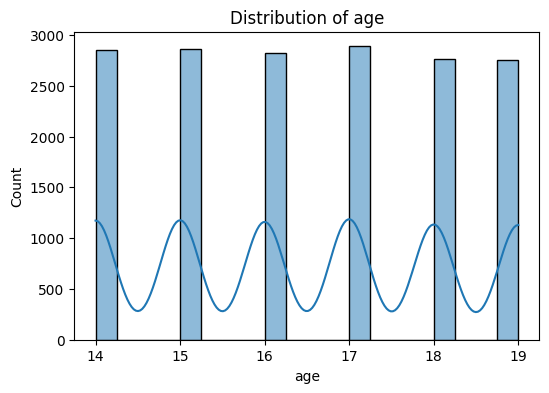

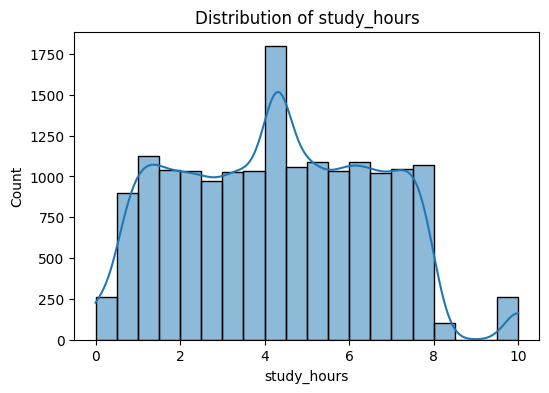

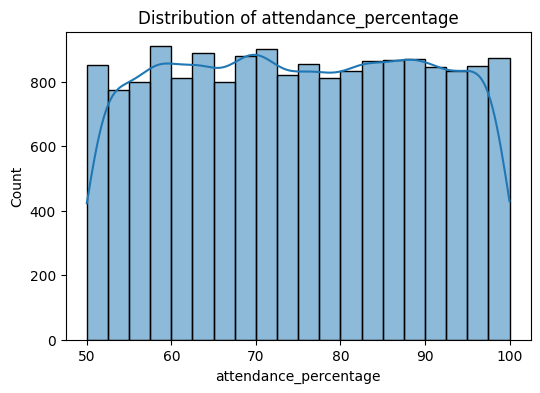

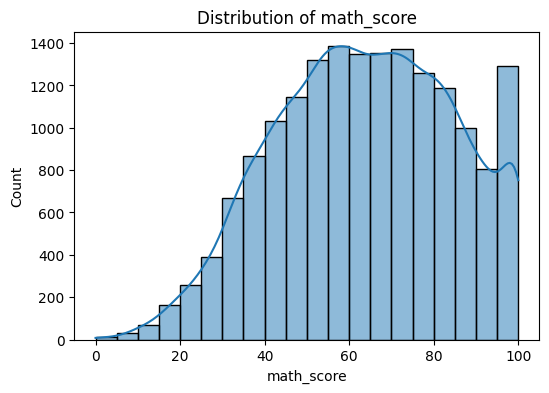

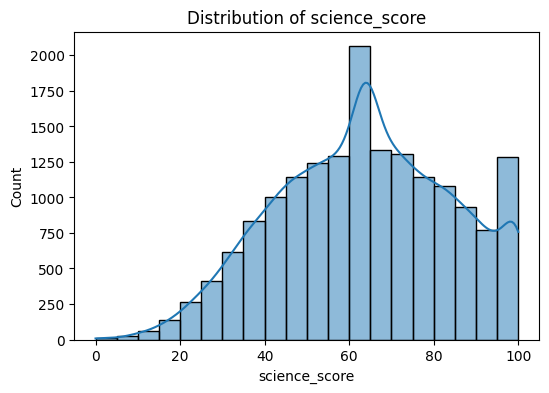

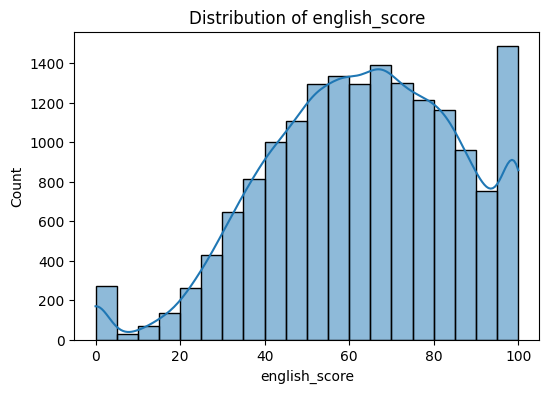

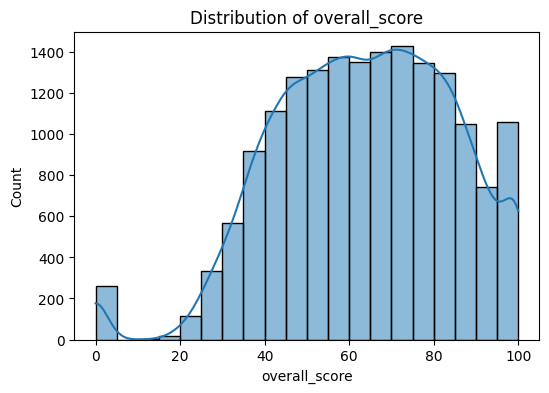

In [ ]:
numeric_colshist = ['age', 'study_hours',"attendance_percentage" , 'math_score', 'science_score', 'english_score','overall_score']

for col in numeric_colshist:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], bins=20, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()



### 1. Study Hours Distribution
- **Peak at ~4 hours:**  
  Most students study around 4 hours daily, indicating an average study pattern.


---
### 2. Student Scores

- **Math, Science, English, Overall Scores** show a **slight left skew**.
- Majority of students have **higher scores**, while a **small number have low scores or zero**.


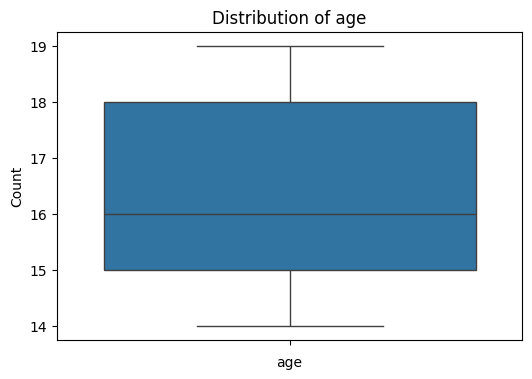

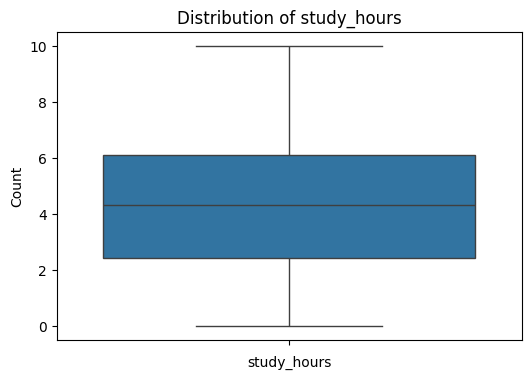

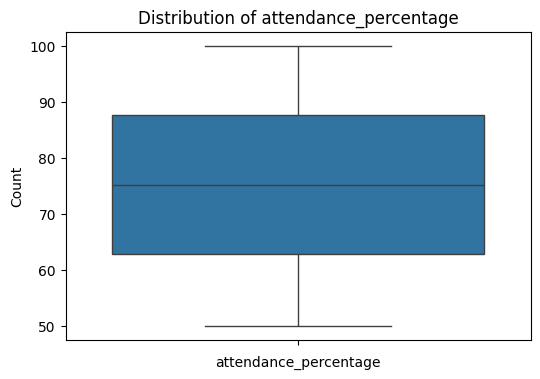

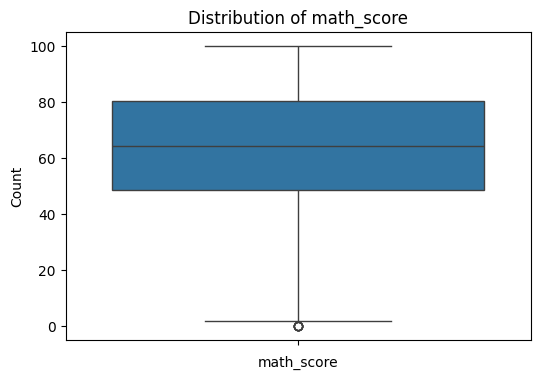

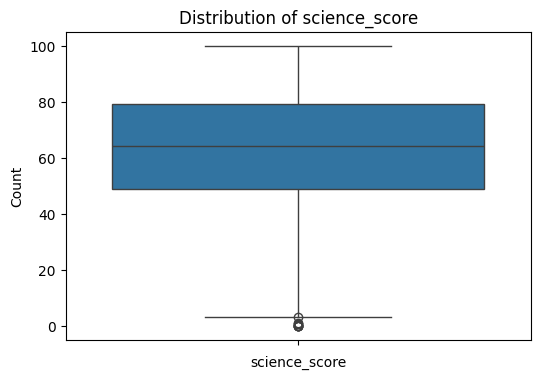

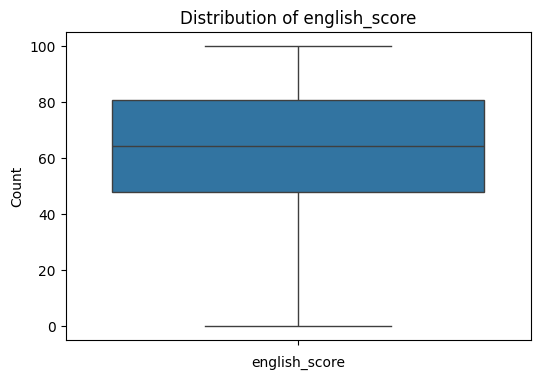

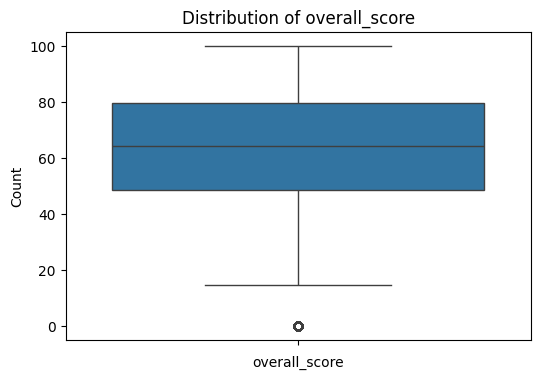

In [ ]:
for col in numeric_colshist:
    plt.figure(figsize=(6,4))
    sns.boxplot(data[col])
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

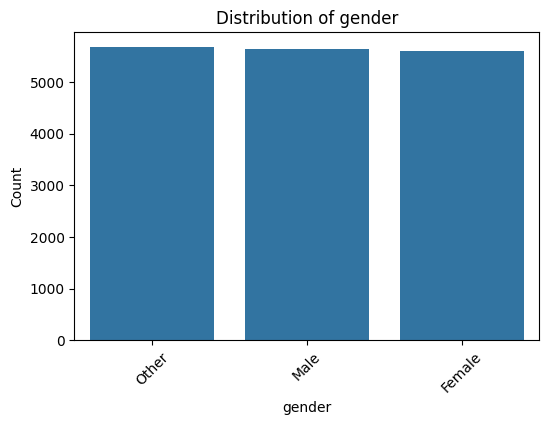

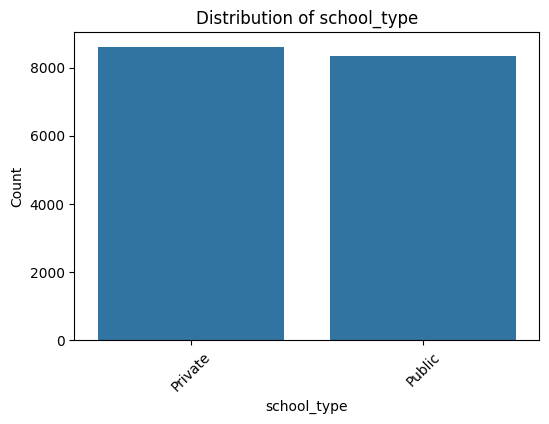

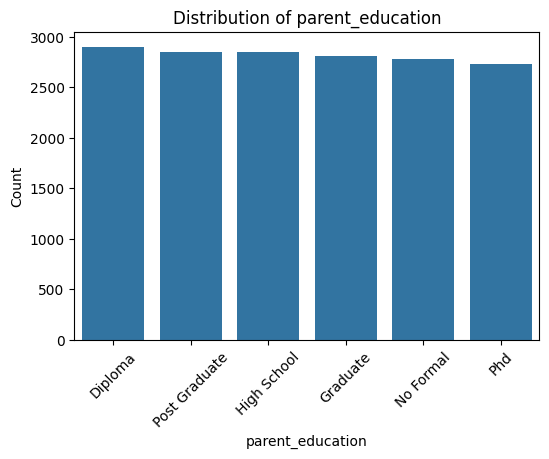

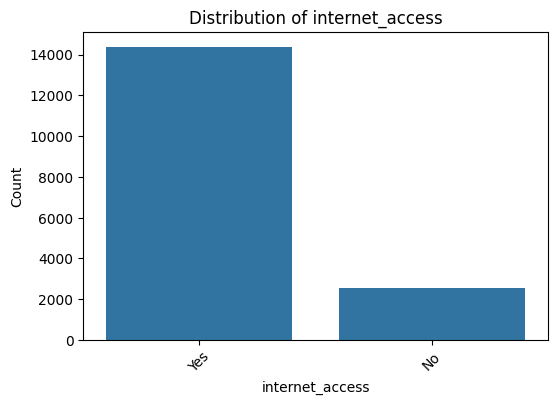

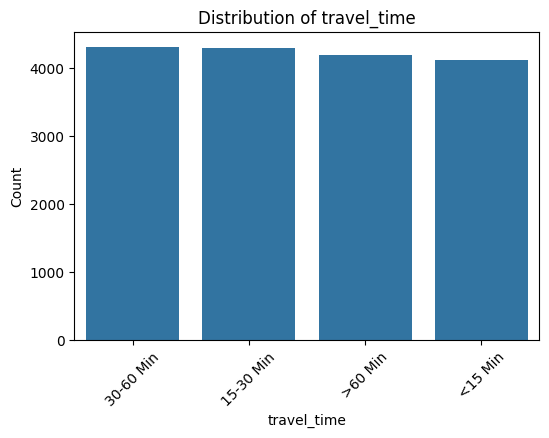

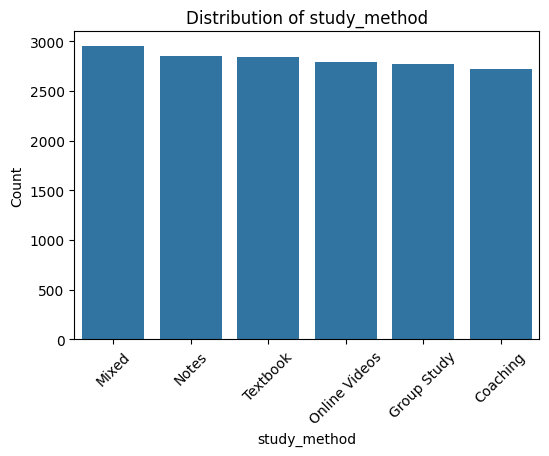

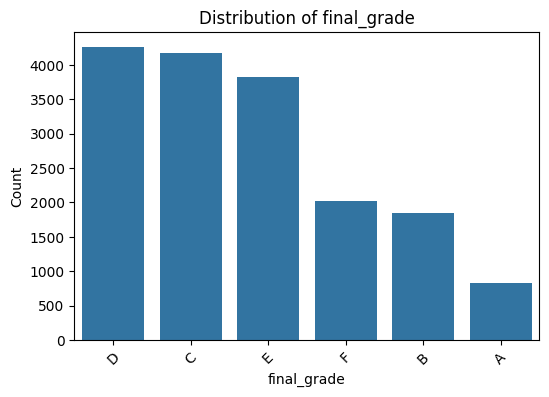

In [ ]:
categorical_colshist = ['gender', 'school_type', 'parent_education', 'internet_access', 'travel_time', 'study_method', 'final_grade']

for col in categorical_colshist:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=data, order=data[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

**INSIGHTS:**
- Majority of students have internet access.
- Small number of NO variations


---


- Most students have grades C, D, or E.
- Fewer students achieved grade F ,B or A.

## **Bivariate Analysis**

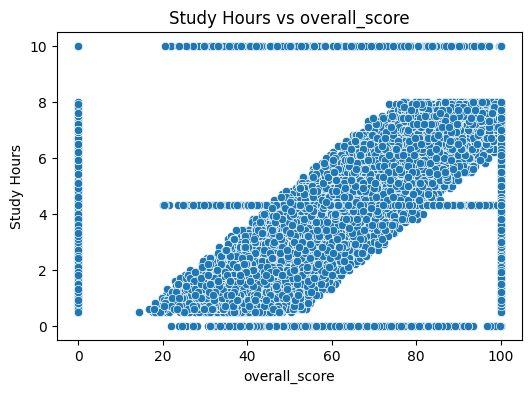

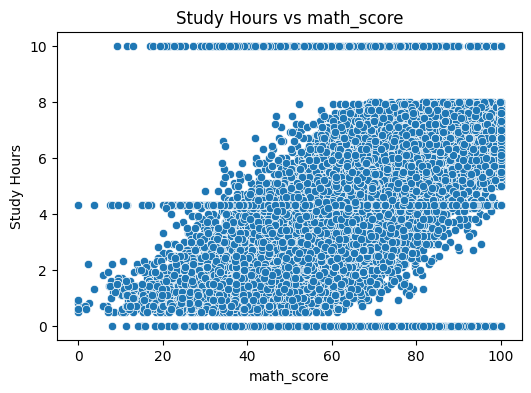

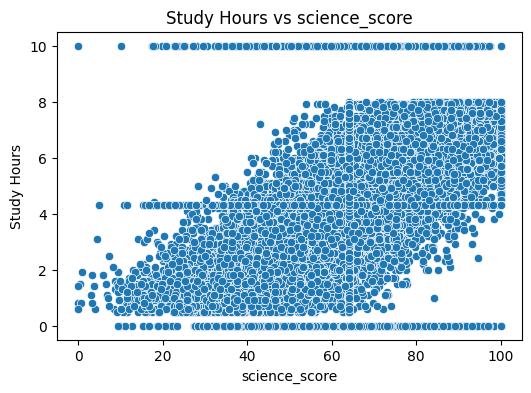

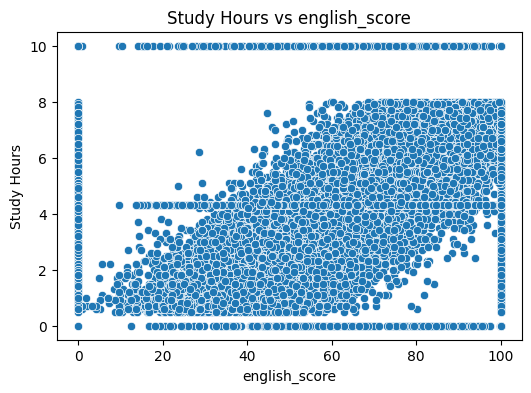

In [ ]:
for col in ['overall_score', 'math_score', 'science_score', 'english_score']:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=col, y='study_hours', data=data)
    plt.title(f"Study Hours vs {col}")
    plt.xlabel(col)
    plt.ylabel("Study Hours")
    plt.show()

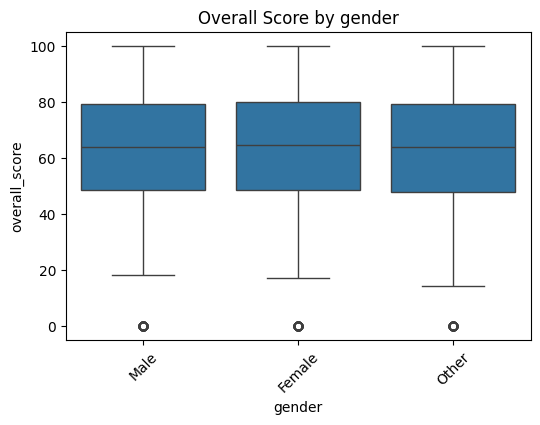

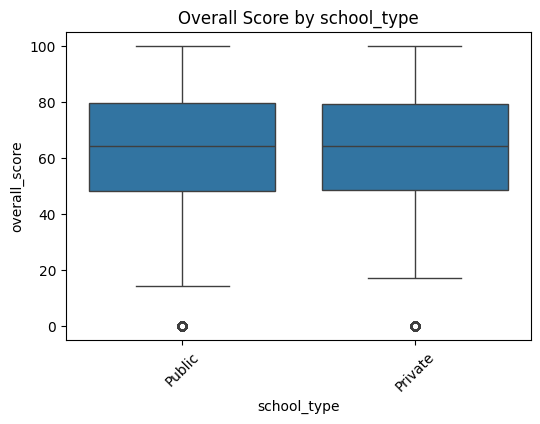

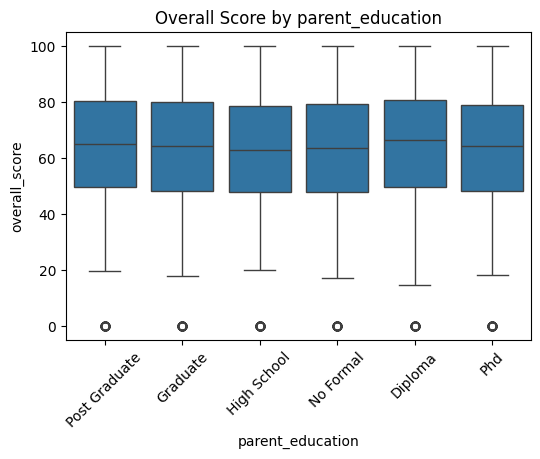

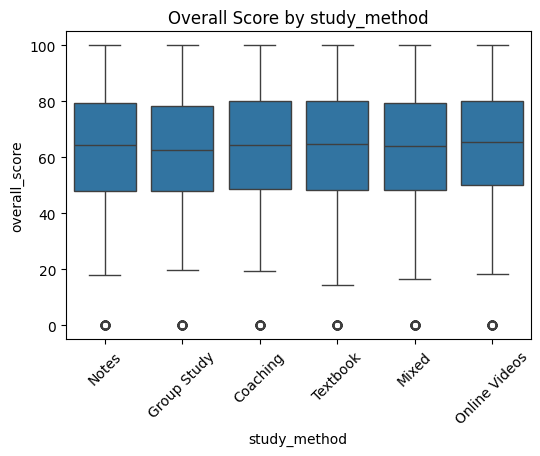

In [ ]:
# Categorical vs Numeric (Boxplots)
for cat_col in ['gender', 'school_type', 'parent_education', 'study_method']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=cat_col, y='overall_score', data=data)
    plt.title(f"Overall Score by {cat_col}")
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
pearson_correlation = data.corr(numeric_only=True,method='pearson')
pearson_correlation

,age,study_hours,attendance_percentage,math_score,science_score,english_score,overall_score
age,1.000000,0.000474,0.005558,-0.003752,0.007178,0.003183,-0.002143
study_hours,0.000474,1.000000,-0.004609,0.706937,0.692469,0.641360,0.708247
attendance_percentage,0.005558,-0.004609,1.000000,0.255513,0.246917,0.225506,0.257913
math_score,-0.003752,0.706937,0.255513,1.000000,0.767404,0.709650,0.782318
science_score,0.007178,0.692469,0.246917,0.767404,1.000000,0.689938,0.766560
english_score,0.003183,0.641360,0.225506,0.709650,0.689938,1.000000,0.704184
overall_score,-0.002143,0.708247,0.257913,0.782318,0.766560,0.704184,1.000000


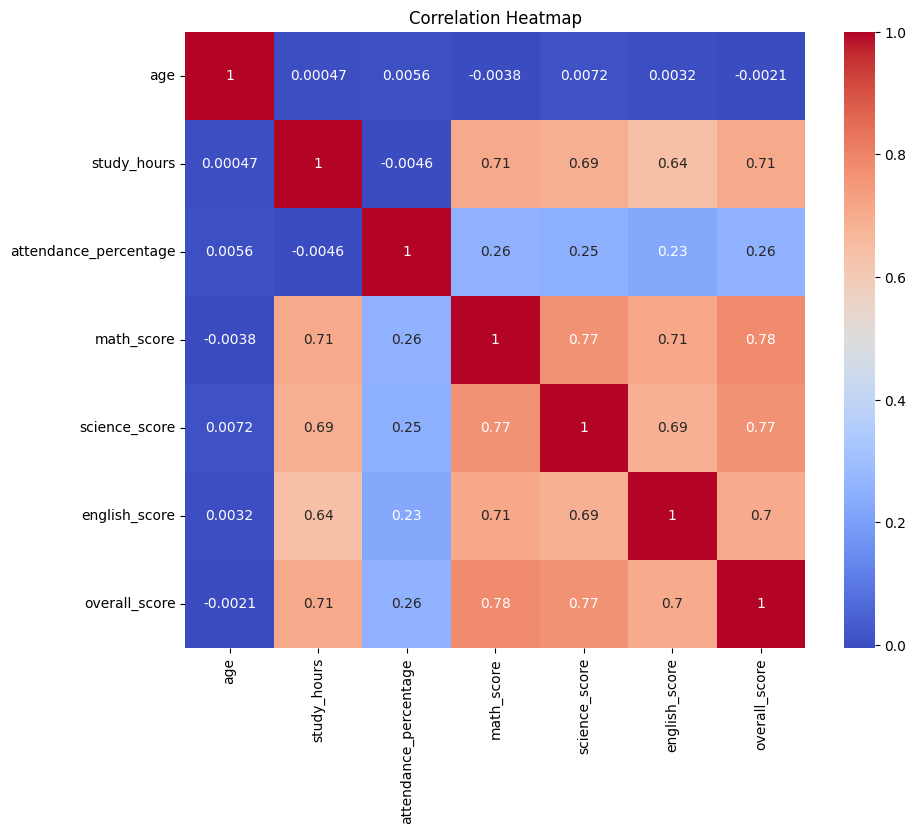

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(pearson_correlation,annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Feature Engineering

**Analyzing Grade Trends**

students who received 'F' are considered Fail, all others Pass.

This new feature helps in quickly identifying overall student performance.



In [ ]:
data['pass_fail'] = data['final_grade'].apply(
    lambda x: 'Fail' if x == 'F' else 'Pass'
)


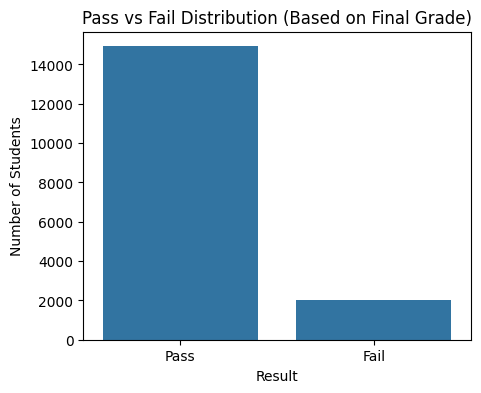

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='pass_fail', data=data)
plt.title('Pass vs Fail Distribution (Based on Final Grade)')
plt.xlabel('Result')
plt.ylabel('Number of Students')
plt.show()

 Most students passed the exam, with a fail rate under 20%.


avg_subject_score provides a general indicator of a student's performance across core subjects.

In [ ]:
data['avg_subject_score'] = (data['math_score'] + data['science_score'] + data['english_score']) / 3


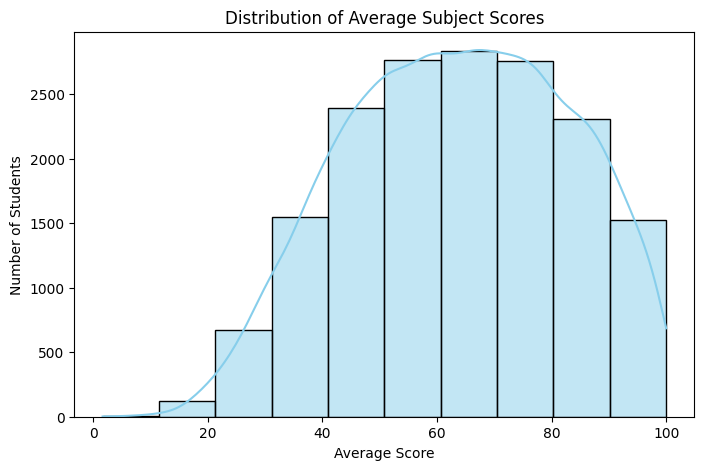

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data['avg_subject_score'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Average Subject Scores')
plt.xlabel('Average Score')
plt.ylabel('Number of Students')
plt.show()


**Attendance** **features**

In [ ]:
data['attendance_level'] = pd.cut(
    data['attendance_percentage'],
    bins=[0,60,85,100],
    labels=['Low','Medium','High']
)


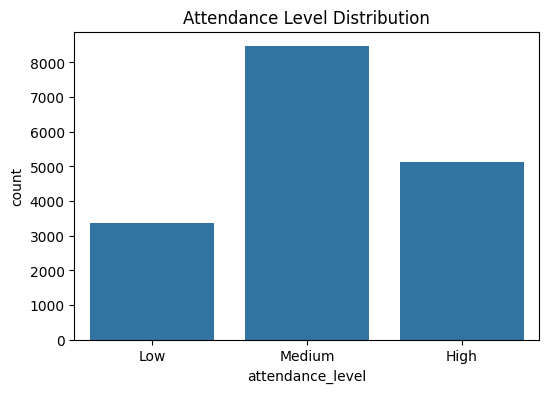

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='attendance_level', data=data)
plt.title('Attendance Level Distribution')
plt.show()


**Student** **At** **Risk**

- Students with **attendance below 70%** OR **average score below 50** are considered at risk.  

In [ ]:
data['at_risk'] = ((data['attendance_percentage'] < 60) | (data['avg_subject_score'] < 50)).astype(int)


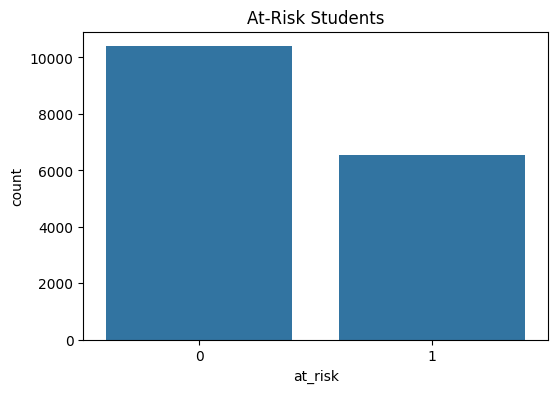

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='at_risk', data=data)
plt.title('At-Risk Students')
plt.show()

**Study** **Hours**

**Insight:**  
The `study_category` feature shows the distribution of students based on their weekly study hours:  
- **Low (0-2 hours)**: may need encouragement to study more.  
- **Medium (2-5 hours)**: average study habit.  
- **High (5+ hours)**: likely well-prepared.  

In [ ]:
data['study_category'] = pd.cut(
    data['study_hours'],
    bins=[0, 2, 5, float('inf')],
    labels=['Low', 'Medium', 'High'],
    right=False
)


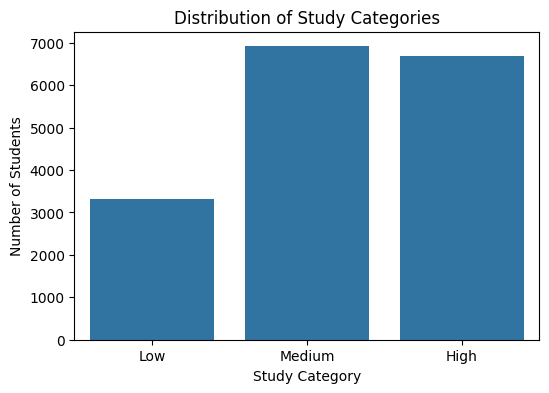

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='study_category', data=data)
plt.title('Distribution of Study Categories')
plt.xlabel('Study Category')
plt.ylabel('Number of Students')
plt.show()

# variables encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
data.select_dtypes(include=['object','category' ]).columns

Index(['gender', 'school_type', 'parent_education', 'internet_access',
       'travel_time', 'study_method', 'final_grade', 'pass_fail',
       'attendance_level', 'study_category'],
      dtype='object')

**Ordinal Encoding**

The `parent_education_ordinal` feature converts parental education levels into a numerical scale, preserving the **ordinal relationship**:  

In [ ]:
education_order = [['No Formal', 'High School', 'Diploma', 'Graduate', 'Post Graduate', 'Phd']] #ordinal

encoder = OrdinalEncoder(categories=education_order)
data['parent_education_ordinal'] = encoder.fit_transform(data[['parent_education']]).astype(int)

data[['parent_education','parent_education_ordinal']].head()


,parent_education,parent_education_ordinal
0,Post Graduate,4
1,Graduate,3
2,Post Graduate,4
3,Post Graduate,4
4,High School,1


The `final_grade_ordinal` feature converts letter grades into numeric values while preserving their natural order:

In [ ]:
grade_order = [['F','E','D','C','B','A']]

encoder = OrdinalEncoder(categories=grade_order)
data['final_grade_ordinal'] = encoder.fit_transform(data[['final_grade']]).astype(int)

data[['final_grade','final_grade_ordinal']].head()

,final_grade,final_grade_ordinal
0,E,1
1,D,2
2,B,4
3,E,1
4,F,0


The ordinal features `attendance_level` and `study_category` were converted into numeric values while preserving their natural order:

In [ ]:
ordinal_cols = ['attendance_level', 'study_category']
ordinal_order = [['Low','Medium','High']]

encoder = OrdinalEncoder(categories=ordinal_order)

for col in ordinal_cols:
    data[col + '_ordinal'] = encoder.fit_transform(data[[col]]).astype(int)

data[['attendance_level','attendance_level_ordinal',
      'study_category','study_category_ordinal']].head()

,attendance_level,attendance_level_ordinal,study_category,study_category_ordinal
0,Medium,1,Medium,1
1,High,2,Medium,1
2,Medium,1,High,2
3,Low,0,Low,0
4,Medium,1,Low,0


The `travel_time_ordinal` feature converts students’ travel time to school into ordered numeric values:

In [ ]:
travel_order = [['<15 Min', '15-30 Min', '30-60 Min', '>60 Min']]
encoder = OrdinalEncoder(categories=travel_order)
data['travel_time_ordinal'] = encoder.fit_transform(data[['travel_time']]).astype(int)

data[['travel_time','travel_time_ordinal']].head()

,travel_time,travel_time_ordinal
0,<15 Min,0
1,>60 Min,3
2,<15 Min,0
3,15-30 Min,1
4,30-60 Min,2


**nominal categorical features/Label Encoding**

- `study_method_label` converts different study methods into numeric labels for modeling

In [ ]:
le = LabelEncoder()
data['study_method_label'] = le.fit_transform(data['study_method'])

data[['study_method', 'study_method_label']].head()


,study_method,study_method_label
0,Notes,3
1,Notes,3
2,Notes,3
3,Notes,3
4,Group Study,1


- `gender_label` converts different genders into numeric labels for modeling

In [ ]:
le = LabelEncoder()
data['gender_label'] = le.fit_transform(data['gender'])

data[['gender', 'gender_label']].head()


,gender,gender_label
0,Male,1
1,Female,0
2,Female,0
3,Other,2
4,Female,0


`internet_access` and `school_type` are binary categorical features and were encoded using `LabelEncoder`:

In [ ]:

le_internet = LabelEncoder()
data['internet_access_label'] = le_internet.fit_transform(data['internet_access'])

le_school = LabelEncoder()
data['school_type_label'] = le_school.fit_transform(data['school_type'])

data[['internet_access','internet_access_label',
      'school_type','school_type_label']].head()


,internet_access,internet_access_label,school_type,school_type_label
0,Yes,1,Public,1
1,Yes,1,Public,1
2,No,0,Private,0
3,No,0,Public,1
4,Yes,1,Public,1


The `pass_fail_label` feature encodes the target variable into numeric form:

In [ ]:
le_pass_fail = LabelEncoder()
data['pass_fail_label'] = le_pass_fail.fit_transform(
    data['pass_fail'])
data[['pass_fail', 'pass_fail_label']].head()


,pass_fail,pass_fail_label
0,Pass,1
1,Pass,1
2,Pass,1
3,Pass,1
4,Fail,0


In [ ]:
cols_to_drop = data.select_dtypes(include=['object','category' ]).columns

data = data.drop(columns=cols_to_drop)
data.head()


,age,study_hours,attendance_percentage,math_score,science_score,english_score,overall_score,avg_subject_score,at_risk,parent_education_ordinal,final_grade_ordinal,attendance_level_ordinal,study_category_ordinal,travel_time_ordinal,study_method_label,gender_label,internet_access_label,school_type_label,pass_fail_label
0,14,3.1,84.3,42.7,55.4,57.0,53.1,51.700000,0,4,1,1,1,0,3,1,1,1,1
1,18,3.7,87.8,57.6,68.8,64.8,61.3,63.733333,0,3,2,2,1,3,3,0,1,1,1
2,17,7.9,65.5,84.8,95.0,79.2,89.6,86.333333,0,4,4,1,2,0,3,0,0,0,1
3,16,1.1,58.1,44.4,27.5,54.7,41.6,42.200000,1,4,1,0,0,1,3,2,0,1,1
4,16,1.3,61.0,8.9,32.7,30.0,25.4,23.866667,1,1,0,1,0,2,1,0,1,1,0


In [ ]:
df=data.copy()

# Feature scaling

Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_cols = data.select_dtypes(include=['int64','float64']).columns


scaler = StandardScaler()


data[numeric_cols] = scaler.fit_transform(data[numeric_cols])


data[numeric_cols].describe().round(2)


,age,study_hours,attendance_percentage,math_score,science_score,english_score,overall_score,avg_subject_score,at_risk,parent_education_ordinal,final_grade_ordinal,attendance_level_ordinal,study_category_ordinal,travel_time_ordinal,study_method_label,gender_label,internet_access_label,school_type_label,pass_fail_label
count,16937.00,16937.00,16937.00,16937.00,16937.00,16937.00,16937.00,16937.00,16937.00,16937.00,16937.00,16937.00,16937.00,16937.00,16937.00,16937.00,16937.00,16937.00,16937.00
mean,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.46,-1.89,-1.74,-3.04,-3.10,-2.81,-3.06,-3.22,-0.79,-1.47,-1.60,-1.58,-1.62,-1.36,-1.48,-1.23,-2.38,-0.98,-2.72
25%,-0.87,-0.83,-0.86,-0.74,-0.72,-0.69,-0.73,-0.76,-0.79,-0.88,-0.85,-0.15,-0.27,-0.46,-0.89,-1.23,0.42,-0.98,0.37
50%,-0.28,0.01,0.00,0.02,0.01,0.04,0.03,0.02,-0.79,-0.29,-0.11,-0.15,-0.27,0.44,0.28,-0.01,0.42,-0.98,0.37
75%,0.89,0.80,0.87,0.78,0.75,0.76,0.77,0.79,1.26,0.89,0.64,1.28,1.08,0.44,0.87,1.22,0.42,1.02,0.37
max,1.48,2.52,1.73,1.73,1.77,1.64,1.75,1.89,1.26,1.48,2.13,1.28,1.08,1.34,1.46,1.22,0.42,1.02,0.37


**Each numeric feature now has mean ~0 and std ~1**

# Feature Selection

The dataset was split into training and testing sets:

- **75% training data**: used to train the model  
- **25% testing data**: used to evaluate model performance on unseen data  

In [ ]:
from sklearn.model_selection import train_test_split


y = data['final_grade_ordinal']

X = data.drop(columns=['final_grade_ordinal'], axis=1, errors='ignore')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

print("Shape:", X_train.shape, X_test.shape)


Shape: (12702, 18) (4235, 18)


Mutual Information (MI) measures the **dependency between each feature and the target variable (`overall_score`)**.

- Higher MI score → stronger relationship with the target  
- MI = 0 → no detectable relationship  


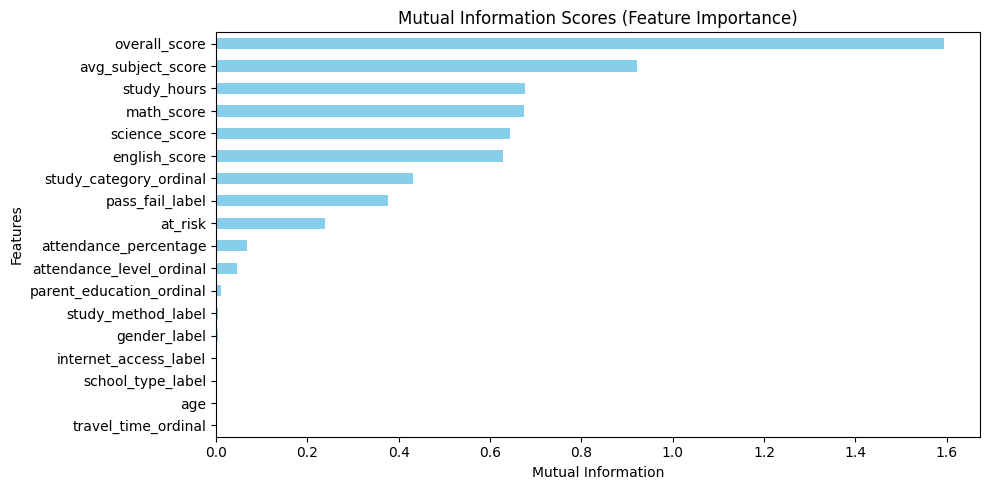

Kept features count: 9
Kept features: ['overall_score', 'avg_subject_score', 'study_hours', 'math_score', 'science_score', 'english_score', 'study_category_ordinal', 'pass_fail_label', 'at_risk']
--------------------------------------------------
Dropped features count: 9
Dropped features: ['attendance_percentage', 'attendance_level_ordinal', 'parent_education_ordinal', 'study_method_label', 'gender_label', 'age', 'travel_time_ordinal', 'internet_access_label', 'school_type_label']


In [ ]:
from sklearn.feature_selection import mutual_info_regression


feature_names = X_train.columns

mi_scores = mutual_info_regression(X_train, y_train, random_state=0)


mi_series = pd.Series(mi_scores, index=feature_names).sort_values(ascending=False)


plt.figure(figsize=(10,5))
mi_series.sort_values().plot.barh(color='skyblue')
plt.title("Mutual Information Scores (Feature Importance)")
plt.xlabel("Mutual Information")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


kept_features = mi_series[mi_series > 0.1].index.tolist()
dropped_features = mi_series[mi_series <= 0.1].index.tolist()

print(f"Kept features count: {len(kept_features)}")
print("Kept features:", kept_features)
print("-"*50)
print(f"Dropped features count: {len(dropped_features)}")
print("Dropped features:", dropped_features)



Recursive Feature Elimination (RFE) selects features by **iteratively training a model and removing the least important features** based on model weights.

Using **Linear Regression** as the base estimator allows RFE to:
- Identify features with the strongest linear relationship to `overall_score`
- Remove redundant or weak predictors
- Produce a compact and interpretable feature set

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


model = LinearRegression()


rfe_selector = RFE(
    estimator=model,
    n_features_to_select=10
)

rfe_selector.fit(X_train, y_train)

rfe_features = X_train.columns[rfe_selector.support_].tolist()

print("Top 10 features selected by RFE:")
print(rfe_features)


Top 10 features selected by RFE:
['study_hours', 'attendance_percentage', 'math_score', 'science_score', 'english_score', 'overall_score', 'avg_subject_score', 'at_risk', 'attendance_level_ordinal', 'pass_fail_label']


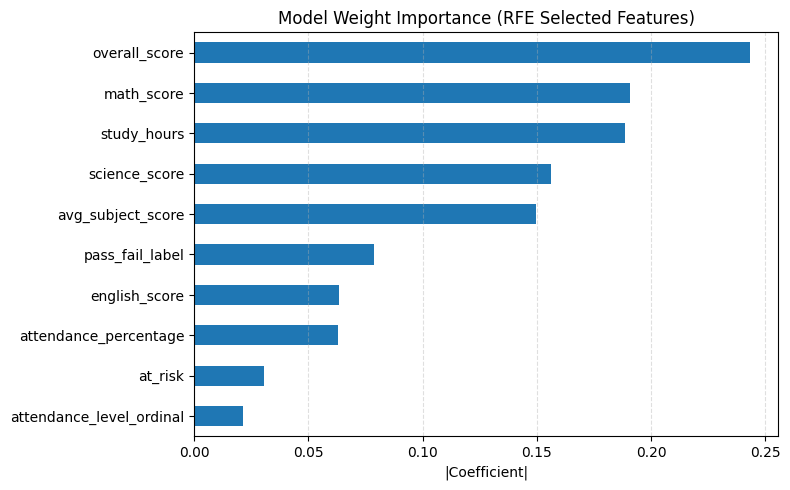

In [ ]:

selected_features = X_train.columns[rfe_selector.support_]


coef = pd.Series(
    rfe_selector.estimator_.coef_.ravel(),
    index=selected_features
)


coef_abs = coef.abs().sort_values()

plt.figure(figsize=(8, 5))
coef_abs.plot.barh()

plt.xlabel("|Coefficient|")
plt.title("Model Weight Importance (RFE Selected Features)")
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()



Lasso regression performs both **regularization** and **feature selection**:

- Coefficients shrunk to zero → features deselected  
- Non-zero coefficients → most predictive features  
- Helps reduce **multicollinearity**, simplify the model, and improve generalization  

Top features with strongest coefficients:
age                        -0.004734
internet_access_label      -0.001513
parent_education_ordinal   -0.001498
gender_label               -0.001210
school_type_label           0.001060
study_category_ordinal      0.001435
travel_time_ordinal         0.001809
attendance_level_ordinal    0.018249
at_risk                     0.025194
english_score               0.053898
attendance_percentage       0.062706
pass_fail_label             0.077365
science_score               0.147673
avg_subject_score           0.170824
math_score                  0.181820
study_hours                 0.186115
overall_score               0.243758
dtype: float64


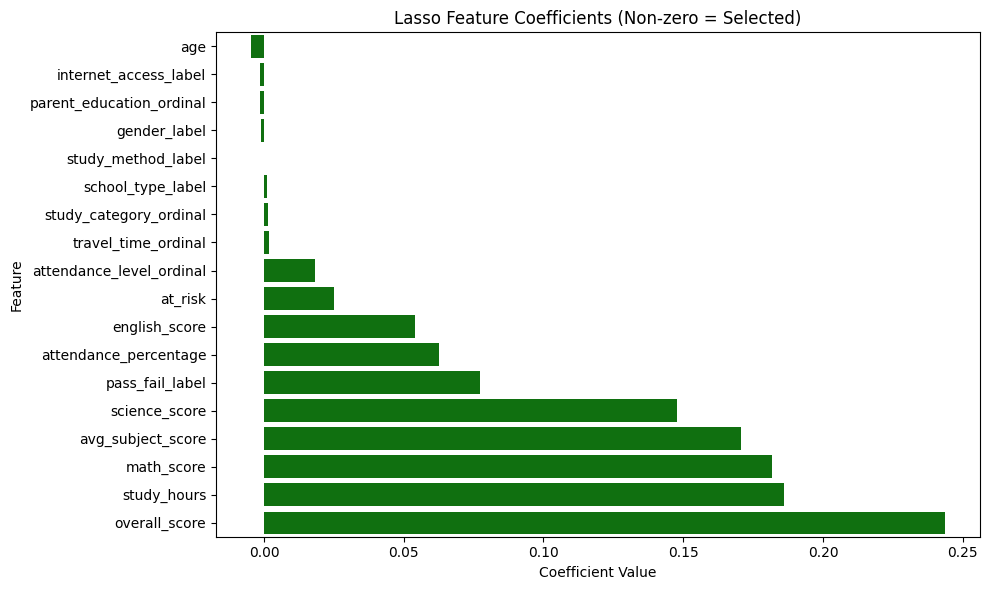

Number of features selected by Lasso: 17
Selected features: ['age', 'internet_access_label', 'parent_education_ordinal', 'gender_label', 'school_type_label', 'study_category_ordinal', 'travel_time_ordinal', 'attendance_level_ordinal', 'at_risk', 'english_score', 'attendance_percentage', 'pass_fail_label', 'science_score', 'avg_subject_score', 'math_score', 'study_hours', 'overall_score']
Deselected features: ['study_method_label']


In [ ]:
from sklearn.linear_model import LassoCV

X_lasso = X_train
y_lasso = y_train

lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_lasso, y_lasso)


lasso_coef = pd.Series(lasso.coef_, index=X_lasso.columns).sort_values()


print("Top features with strongest coefficients:")
print(lasso_coef[lasso_coef != 0])


plt.figure(figsize=(10,6))
colors = ['green' if coef != 0 else 'red' for coef in lasso_coef]
sns.barplot(x=lasso_coef.values, y=lasso_coef.index, palette=colors)
plt.title("Lasso Feature Coefficients (Non-zero = Selected)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

selected_features_lasso = lasso_coef[lasso_coef != 0].index.tolist()
deselected_features_lasso = lasso_coef[lasso_coef == 0].index.tolist()

print("Number of features selected by Lasso:", len(selected_features_lasso))
print("Selected features:", selected_features_lasso)
print("Deselected features:", deselected_features_lasso)


# Probability & Hypothesis Testing

In this section, we analyze student data to understand probabilities and perform relevant statistical tests.  
We will focus on:

- Calculating the **probability of passing** based on features such as attendance percentage or internet access.
- Conducting **hypothesis testing** to examine the relationships between different variables and academic performance.


In [ ]:
high_attendance = df[df['attendance_percentage'] >= 75]
prob_pass_high_attendance = high_attendance['pass_fail_label'].mean()
print(f"Probability of passing given high attendance (>= 75%): {prob_pass_high_attendance:.2f}")

Probability of passing given high attendance (>= 75%): 0.95


### Probability Insights: Attendance

- **Observation:** Students who attend classes regularly (≥ 75% attendance) have a very high chance of passing.
- **Probability of Passing:** 0.95
- **Insight:** Attendance is strongly linked to academic success. Encouraging consistent attendance can significantly improve overall student performance.



In [ ]:
high_study_hours = df[df['study_hours'] >= 5]
prob_pass_high_study_hours = high_study_hours['pass_fail_label'].mean()
print(f"Probability of passing given high study hours (scaled study_hours >= 0): {prob_pass_high_study_hours:.2f}")

Probability of passing given high study hours (scaled study_hours >= 0): 0.99


### Probability Insights: Study Hours

- **Observation:** Students who study for 5 hours or more have an extremely high chance of passing.
- **Probability of Passing:** 0.99
- **Insight:** High study hours are strongly associated with success. Encouraging students to dedicate sufficient time to studying can greatly improve their performance.



In [ ]:
internet_access_yes = df[df['internet_access_label'] == 1]
prob_pass_internet_access = internet_access_yes['pass_fail_label'].mean()
internet_no = df[df['internet_access_label'] == 0]
prob_pass_no_internet = internet_no['pass_fail_label'].mean()

print(f"Probability of passing with internet: {prob_pass_internet_access:.2f}")
print(f"Probability of passing without internet: {prob_pass_no_internet:.2f}")


Probability of passing with internet: 0.88
Probability of passing without internet: 0.87


### Probability Insights: Internet Access

- **Observation:** Students with internet access have almost the same chance of passing as those without.
- **Probability of Passing:**
  - With Internet: 0.88
  - Without Internet: 0.87
- **Insight:** The difference is minimal, suggesting that internet access does **not have a significant effect** on passing rates in this dataset.




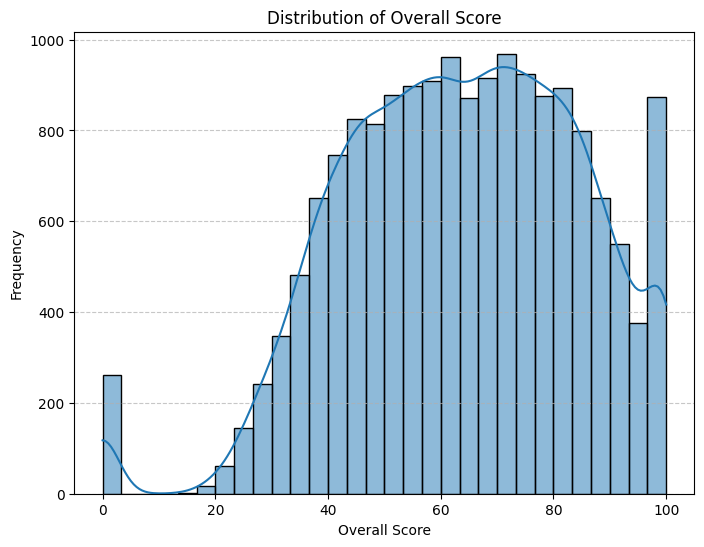

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['overall_score'], bins=30, kde=True)
plt.title('Distribution of Overall Score')
plt.xlabel('Overall Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Reasoning**:
To understand if the `overall_score` distribution supports parametric testing, I will first calculate its mean and standard deviation, then fit and plot a normal distribution curve on top of the histogram for visual comparison.



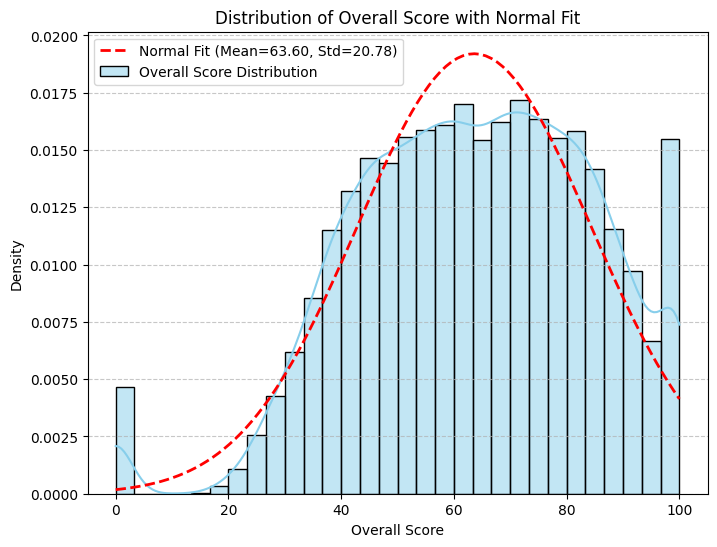

In [ ]:
import scipy.stats as stats

plt.figure(figsize=(8, 6))
sns.histplot(df['overall_score'], bins=30, kde=True, stat='density', color='skyblue', label='Overall Score Distribution')

# Fit a normal distribution
mu, sigma = df['overall_score'].mean(), df['overall_score'].std()
x = np.linspace(0, 100, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='red', linestyle='--', linewidth=2, label=f'Normal Fit (Mean={mu:.2f}, Std={sigma:.2f})')

plt.title('Distribution of Overall Score with Normal Fit')
plt.xlabel('Overall Score')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Overall Score Distribution Discussion

The visual inspection of the `overall_score` distribution, with an overlaid normal curve, suggests that the scores are approximately normally distributed, with a clear peak around the mean (~63.60) and tails tapering off. While not perfectly normal, the bell-shaped curve indicates a general adherence to normality, which is a common assumption for many parametric tests. Therefore, it generally supports the use of parametric statistical testing, although more formal tests (like Shapiro-Wilk or Kolmogorov-Smirnov) could provide a more definitive answer.

In [ ]:
from scipy import stats

# Divide students into high and low attendance groups based on scaled attendance_percentage
# Original 75% attendance is approximately 0 in the scaled data
high_attendance_scores = df[df['attendance_percentage'] >= 75]['overall_score']
low_attendance_scores = df[df['attendance_percentage'] < 75]['overall_score']

print(f"High attendance group size: {len(high_attendance_scores)}")
print(f"Low attendance group size: {len(low_attendance_scores)}")


High attendance group size: 8502
Low attendance group size: 8435


**Reasoning**:
Now that the high and low attendance groups' `overall_score` data are prepared, I will perform an independent samples t-test to compare their means. This will involve stating the null and alternative hypotheses, executing the t-test, and then interpreting the test statistic, p-value, and conclusion.



In [ ]:
from scipy import stats

# 1️⃣ State the hypotheses
print("Null Hypothesis (H0): There is no significant difference in the mean overall score between high and low attendance students.")
print("Alternative Hypothesis (H1): There is a significant difference in the mean overall score between high and low attendance students.\n")

# 2️⃣ Divide students into high and low attendance groups
high_attendance_scores = df[df['attendance_percentage'] >= 75]['overall_score']
low_attendance_scores = df[df['attendance_percentage'] < 75]['overall_score']


# 4️⃣ Perform independent t-test
t_stat, p_val = stats.ttest_ind(high_attendance_scores, low_attendance_scores, equal_var=False)
print(f"Independent t-test results:")
print(f"  Test Statistic (t): {t_stat:.4f}")
print(f"  P-value: {p_val:.4f}\n")

# 5️⃣ Conclusion
alpha = 0.05
if p_val < alpha:
    print(f"Conclusion: Since the p-value ({p_val:.4f}) is less than alpha ({alpha}), we reject the null hypothesis.")
    print("This suggests there is a significant difference in the mean overall score between high and low attendance students.")
else:
    print(f"Conclusion: Since the p-value ({p_val:.4f}) is greater than alpha ({alpha}), we fail to reject the null hypothesis.")
    print("This suggests there is no significant difference in the mean overall score between high and low attendance students.")


Null Hypothesis (H0): There is no significant difference in the mean overall score between high and low attendance students.
Alternative Hypothesis (H1): There is a significant difference in the mean overall score between high and low attendance students.

Independent t-test results:
  Test Statistic (t): 29.7347
  P-value: 0.0000

Conclusion: Since the p-value (0.0000) is less than alpha (0.05), we reject the null hypothesis.
This suggests there is a significant difference in the mean overall score between high and low attendance students.


### Attendance vs Overall Score

**Null Hypothesis (H0):** There is no significant difference in the mean overall score between high and low attendance students.  
**Alternative Hypothesis (H1):** There is a significant difference in the mean overall score between high and low attendance students.  

**Independent t-test results:**  
- Test Statistic (t): 29.73  
- P-value: 0.0000  

**Insight:**  
Since the p-value is less than 0.05, we **reject the null hypothesis**.  
This suggests that students with higher attendance (≥75%) tend to have **significantly higher overall scores** than those with lower attendance. Attendance has a **positive impact** on student performance.



In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# 1️⃣ Hypotheses
print("Null Hypothesis (H0): There is no association between internet access and passing status.")
print("Alternative Hypothesis (H1): There is an association between internet access and passing status.\n")

# 2️⃣ Contingency table
contingency_table = pd.crosstab(df['internet_access_label'], df['pass_fail_label'])
contingency_table.columns = ['Fail', 'Pass']
contingency_table.index = ['No Internet', 'Internet']

print("Contingency Table:")
print(contingency_table, "\n")

# 3️⃣ Chi-Square test
chi2, p_val, dof, expected = chi2_contingency(contingency_table)



print(f"Chi-Square Test Results:")
print(f"  Chi-square statistic : {chi2:.4f}")
print(f"  P-value             : {p_val:.4f}")
print(f"  Degrees of freedom   : {dof}\n")

# 4️⃣ Conclusion
alpha = 0.05
if p_val < alpha:
    print(f"Conclusion: p-value ({p_val:.4f}) < alpha ({alpha}), reject H0.")
    print("There is a significant association between internet access and passing status.")
else:
    print(f"Conclusion: p-value ({p_val:.4f}) >= alpha ({alpha}), fail to reject H0.")
    print("No significant association between internet access and passing status.")


Null Hypothesis (H0): There is no association between internet access and passing status.
Alternative Hypothesis (H1): There is an association between internet access and passing status.

Contingency Table:
             Fail   Pass
No Internet   326   2224
Internet     1690  12697 

Chi-Square Test Results:
  Chi-square statistic : 2.1261
  P-value             : 0.1448
  Degrees of freedom   : 1

Conclusion: p-value (0.1448) >= alpha (0.05), fail to reject H0.
No significant association between internet access and passing status.


### Internet Access vs Passing Status

**H0:** No association between internet access and passing status.  
**H1:** There is an association between internet access and passing status.  

**Contingency Table:**

|                | Fail | Pass  |
|----------------|------|-------|
| No Internet    | 326  | 2224  |
| Internet       | 1690 | 12697 |

**Chi-Square Test:**  
- Chi2 = 2.1261, p = 0.1448  

**Insight:**  
P-value > 0.05 → fail to reject H0.  
Internet access **does not significantly affect** passing status.


# PCA on Student Data

- **Goal:** Reduce dimensionality while keeping most of the variance.
- **Method:** PCA with `n_components=0.95` (keep 95% variance).



In [ ]:
data.head()

,age,study_hours,attendance_percentage,math_score,science_score,english_score,overall_score,avg_subject_score,at_risk,parent_education_ordinal,final_grade_ordinal,attendance_level_ordinal,study_category_ordinal,travel_time_ordinal,study_method_label,gender_label,internet_access_label,school_type_label,pass_fail_label
0,-1.455212,-0.523313,0.639219,-1.006044,-0.403896,-0.277200,-0.505556,-0.616856,-0.793113,0.889504,-0.854519,-0.148444,-0.268827,-1.358170,0.284537,-0.006076,0.421003,1.016611,0.367575
1,0.894184,-0.258574,0.882256,-0.295046,0.247940,0.069983,-0.110841,0.008420,-0.793113,0.299924,-0.109142,1.280887,-0.268827,1.344712,0.284537,-1.231133,0.421003,1.016611,0.367575
2,0.306835,1.594606,-0.666236,1.002882,1.522426,0.710935,1.251408,1.182762,-0.793113,0.889504,1.381613,-0.148444,1.077455,-1.358170,0.284537,-1.231133,-2.375281,-0.983661,0.367575
3,-0.280514,-1.405780,-1.180085,-0.924924,-1.761077,-0.379574,-1.059120,-1.110496,1.260855,0.889504,-0.854519,-1.577774,-1.615109,-0.457210,0.284537,1.218981,-2.375281,1.016611,0.367575
4,-0.280514,-1.317533,-0.978712,-2.618911,-1.508126,-1.478984,-1.838923,-2.063133,1.260855,-0.879235,-1.599896,-0.148444,-1.615109,0.443751,-0.894184,-1.231133,0.421003,1.016611,-2.720531


In [ ]:
dataforpca=data.copy()

In [ ]:
x = dataforpca.drop('overall_score' ,axis=1)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
x_pca = pca.fit_transform(x)

print("Number of Principal Components chosen:", x_pca.shape[1])

explained_variance_ratio = pca.explained_variance_ratio_
total_variance_explained = explained_variance_ratio.sum()
print("Explained Variance Ratio per PC:", explained_variance_ratio)
print("Total Variance Explained:", total_variance_explained)


Number of Principal Components chosen: 12
Explained Variance Ratio per PC: [0.3665728  0.11582323 0.0572262  0.0563705  0.05580937 0.05554887
 0.055073   0.05467693 0.05422887 0.03463218 0.02684689 0.02164197]
Total Variance Explained: 0.9544508086038704


 **Results:**
  - Number of components chosen: 12
  - Explained Variance Ratio per Component:  
    PC1 = 36.9%, PC2 = 12.1%, PC3 = 5.97%, PC4 = 5.88%, PC5 = 5.82%, PC6 = 5.80%, PC7 = 5.75%, PC8 = 5.71%, PC9 = 5.66%, PC10 = 2.81%, PC11 = 2.26%, PC12 = 1.84%
  - Total Variance Explained: 96.5%
- **Insight:** Using 12 components retains almost all variance, effectively reducing dimensionality from the original number of features while keeping the essential information.

In [ ]:
pc_columns = [f'PC{i+1}' for i in range(x_pca.shape[1])]
x_pca_df = pd.DataFrame(x_pca, columns=pc_columns)

In [ ]:

loadings = pd.DataFrame(
    pca.components_.T,
    columns=pc_columns,
    index=x.columns
)

loadings


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
age,0.000730,0.002837,0.215254,0.270327,-0.547407,0.597922,0.002028,0.467815,-0.064768,0.009246,-0.006771,-0.003994
study_hours,0.315598,-0.271951,-0.008491,0.003498,-0.006975,0.003119,0.007134,-0.003129,0.005741,-0.183246,0.490440,-0.100827
attendance_percentage,0.138502,0.612519,-0.004355,-0.003105,-0.003560,-0.000869,0.006129,0.009189,0.011823,-0.088316,0.209495,0.238808
math_score,0.349500,-0.046930,-0.004139,0.000638,0.005246,-0.007097,-0.001296,0.001138,-0.005950,-0.059406,-0.132658,0.191285
science_score,0.344137,-0.048045,0.010432,0.001641,-0.008416,-0.001965,-0.007650,0.002187,-0.001565,-0.077962,-0.155227,0.203755
english_score,0.328493,-0.045701,0.005325,-0.003105,-0.001399,0.000105,0.013989,0.002663,0.002905,-0.107979,-0.454742,0.002023
avg_subject_score,0.377226,-0.051926,0.004284,-0.000392,-0.001637,-0.003235,0.002249,0.002228,-0.001587,-0.091341,-0.280380,0.142770
at_risk,-0.275902,-0.290162,-0.004724,0.001325,-0.010116,-0.001138,0.008240,0.008047,0.001101,-0.010736,0.200395,0.857444
parent_education_ordinal,0.003124,0.002826,0.478759,-0.462442,0.115150,0.301772,0.101503,-0.287148,-0.599615,-0.006650,0.013453,0.006315
final_grade_ordinal,0.366113,-0.047786,-0.003162,-0.002133,-0.000412,-0.009814,0.005629,0.000960,0.000876,-0.028642,0.008404,0.219376


### PCA Loadings Insights

- **PC1:** Strongly represents overall academic performance (`math_score`, `science_score`, `english_score`, `avg_subject_score`, `final_grade_ordinal`).  
- **PC2:** Mainly reflects attendance and engagement (`attendance_percentage`, `attendance_level_ordinal`).  
- **PC3:** Captures study habits and methods (`study_hours`, `study_method_label`, `parent_education_ordinal`).  

**Overall Insight:** PCA efficiently reduces 16 features into 12 components while preserving key patterns in performance, attendance, study habits, and demographics.


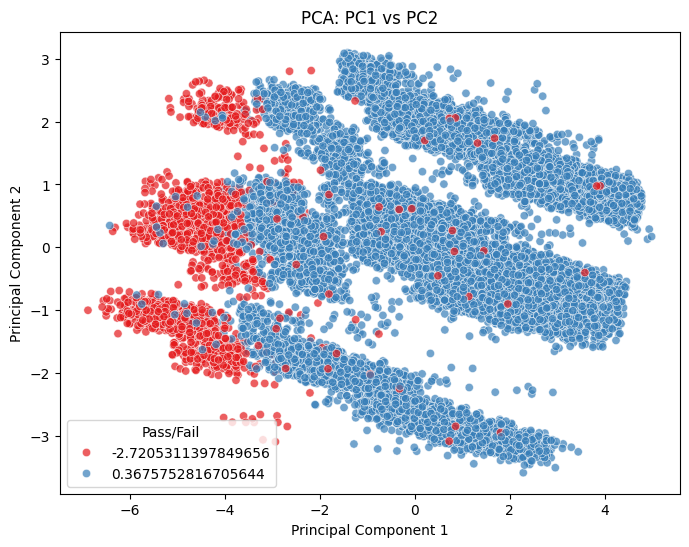

In [ ]:

plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue=dataforpca['pass_fail_label'], data=x_pca_df, palette='Set1', alpha=0.7)
plt.title('PCA: PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Pass/Fail')
plt.show()

# Student Performance GUI

💻 **Launch the GUI here:**

[**Interactive Analysis Dashboard**](https://42b2395795fe03daa8.gradio.live/)

Explore and analyze **student performance** through this Colab GUI.

### Key Features:
- View and update student information.
- Monitor grades, attendance, and at-risk status.
- Analyze study habits and performance trends.

[Open in Colab](https://colab.research.google.com/drive/1MRhTTouy6odmUCo6joPJ4K6-fJA3w9Qy?usp=sharing)

